In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
# Check for null values
train.Dates.isnull().sum() + train.Category.isnull().sum() + train.Descript.isnull().sum() + train.DayOfWeek.isnull().sum() + train.PdDistrict.isnull().sum() + train.Resolution.isnull().sum() + train.Address.isnull().sum() + train.X.isnull().sum() + train.Y.isnull().sum()

0

In [50]:
# Data reconfiguration function

def date_to_hours(date):
    '''Turn Date column into hours and fractional minutes'''
    hour = date[11:13]
    minute = date[14:16]
    frac = float(minute)/60.0
    return int(hour) + frac

def split_date(data):
    data['Year'] = data.Dates.apply(lambda x: int(x[0:4]))
    data['Month'] = data.Dates.apply(lambda x: int(x[5:7]))
    data['Day'] = data.Dates.apply(lambda x: int(x[8:10]))
    data['Time'] = data.Dates.apply(date_to_hours)
    
split_data(train)
split_data(test.csv)

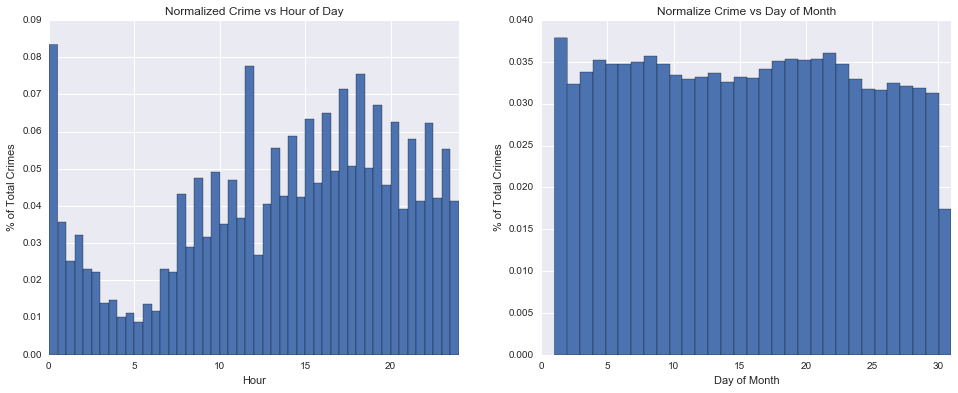

In [51]:
plt.rcParams['figure.figsize'] = 25, 6
plt.subplot(1,3,1)
plt.hist(train.Time, 48, normed=True)
plt.title('Normalized Crime vs Hour of Day')
plt.xlabel('Hour')
plt.ylabel('% of Total Crimes')
plt.xlim([0,24])

plt.subplot(1,3,2)
plt.hist(train.Day, 31, normed=True)
plt.title('Normalize Crime vs Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('% of Total Crimes')
plt.xlim([0,31])
plt.show()

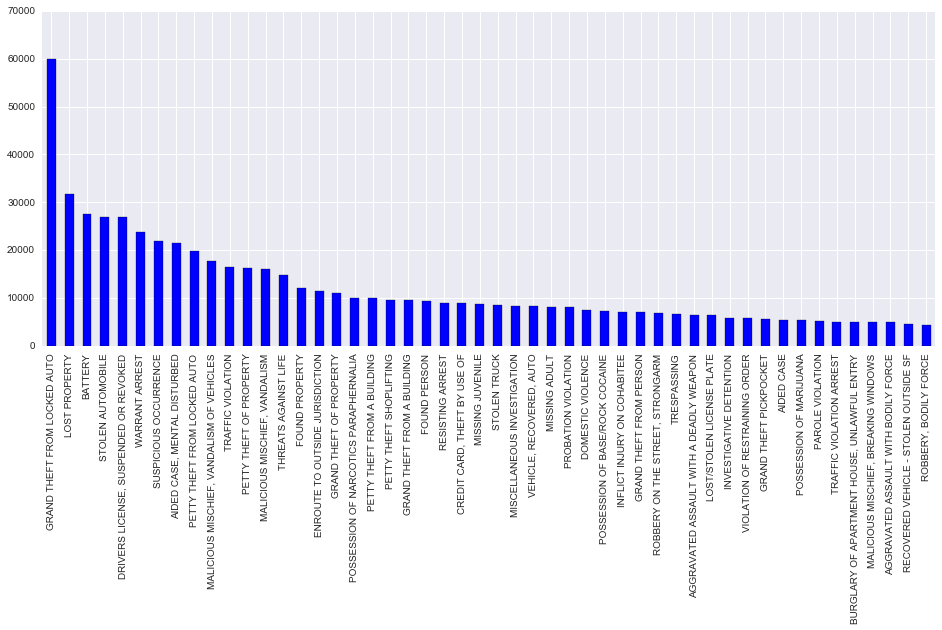

In [52]:
plt.rcParams['figure.figsize'] = 16, 6
train.Descript.value_counts()[:50].plot(kind='bar')
train.Category.value_counts()
train.Resolution.value_counts()

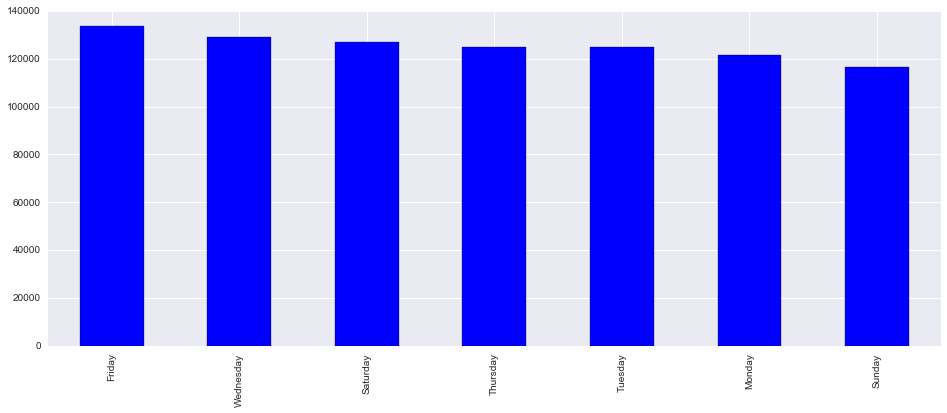

In [53]:
train.DayOfWeek.value_counts()[:7].plot(kind='bar')

GRAND THEFT FROM LOCKED AUTO


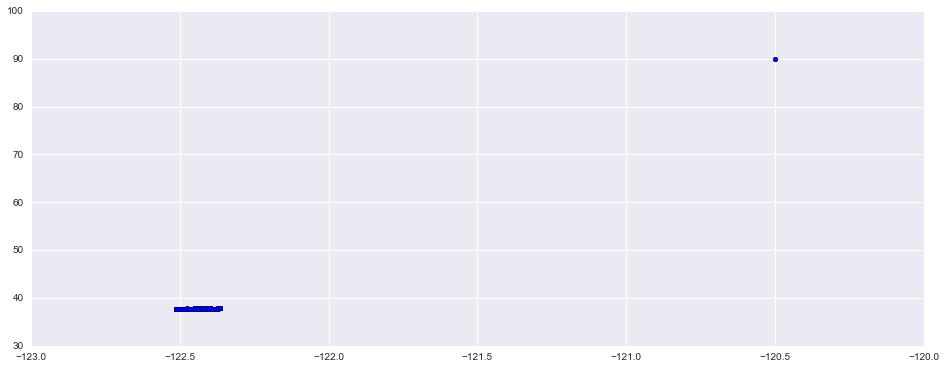

In [54]:
top50 = train.Descript.value_counts()[0:50]
n = 0
print top50.index[n]
xs = list(train[(train.Descript==top50.index[n])].X) #& (train.X < -122.0)].X)
ys = list(train[(train.Descript==top50.index[n])].Y) #& (train.X < -122.0)].Y)

plt.scatter(xs, ys, alpha=.3)
plt.show()

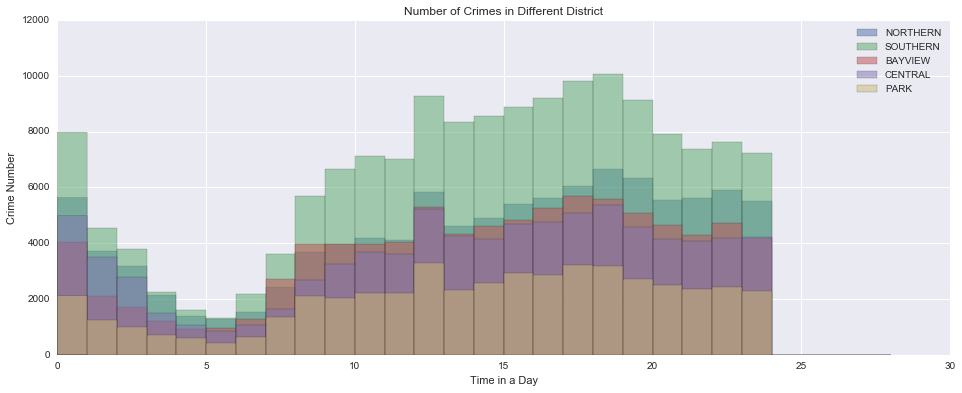

In [55]:
# from matplotlib.font_manager import FontProperties

# fontP = FontProperties()
# fontP.set_size('medium')

plt.hist(train.Time[train.PdDistrict== "NORTHERN"], bins=np.arange(0, 29, 1), alpha=.5)
plt.hist(train.Time[train.PdDistrict== "SOUTHERN"], bins=np.arange(0, 29, 1), alpha=.5)
plt.hist(train.Time[train.PdDistrict== "BAYVIEW"], bins=np.arange(0, 29, 1), alpha=.5)
plt.hist(train.Time[train.PdDistrict== "CENTRAL"], bins=np.arange(0, 29, 1), alpha=.5)
plt.hist(train.Time[train.PdDistrict== "PARK"], bins=np.arange(0, 29, 1), alpha=.5)

plt.legend(['NORTHERN', 'SOUTHERN', "BAYVIEW", "CENTRAL", "PARK"])
plt.title('Number of Crimes in Different District')
plt.xlabel('Time in a Day')
plt.ylabel('Crime Number')
plt.show()

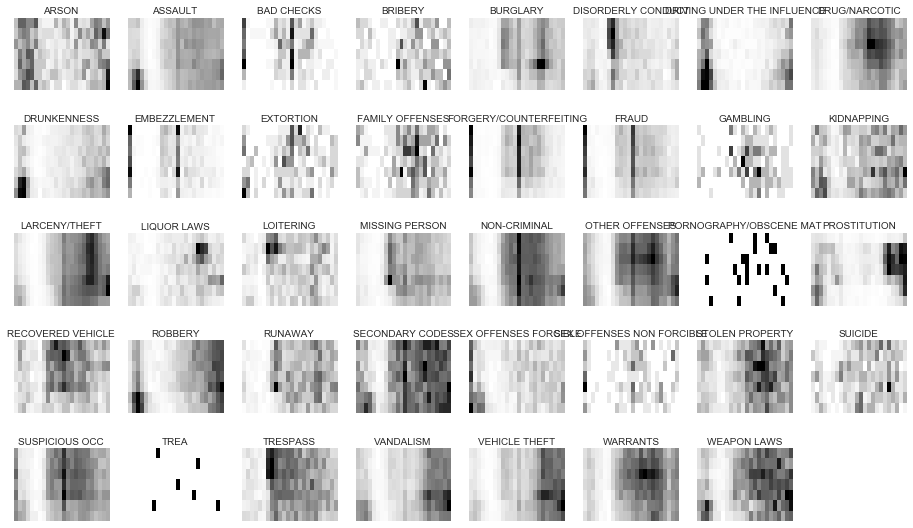

In [56]:
# Add column containing day of week expressed in integer
dow = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}
train['DOW'] = train.DayOfWeek.map(dow)
cats = pd.Series(train.Category.values.ravel()).unique()
cats.sort()

plt.figure(2,figsize=(16,9))
plt.subplots_adjust(hspace=0.5)
for i in np.arange(1,cats.size + 1):
    ax = plt.subplot(5,8,i)
    ax.set_title(cats[i - 1],fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.hist2d(
        train[train.Category==cats[i - 1]].Time.values,
        train[train.Category==cats[i - 1]].DOW.values, 
        bins=[24,7],
        range=[[-0.5,23.5],[-0.5,6.5]]
    )
    plt.gca().invert_yaxis()

In [62]:
train.Resolution.value_counts()
sort_train = train[0:20].sort_values(['Year','Month','Day','Time'], ascending=[1,1,1,1])

def filtering(s):
    if 'ARREST' in s:
        return 1
    else:
        return 0
    
# sort_train['RecArr'] = sort_train.apply(filtering)
# print sort_train.RecArr

for i, crime in enumerate(sort_train.values):
    if 'ARREST' in crime[5]:
        sort_train.loc[i+1, 'RecArr'] = 1
        print crime[5]
    else:
        sort_train.loc[i+1, 'RecArr'] = 0
print sort_train

ARREST, BOOKED
ARREST, BOOKED
ARREST, BOOKED
ARREST, BOOKED
                  Dates        Category  \
19  2015-05-13 21:30:00    NON-CRIMINAL   
18  2015-05-13 21:40:00  OTHER OFFENSES   
17  2015-05-13 21:55:00         ASSAULT   
14  2015-05-13 22:00:00    NON-CRIMINAL   
15  2015-05-13 22:00:00    NON-CRIMINAL   
16  2015-05-13 22:00:00         ROBBERY   
13  2015-05-13 22:06:00   LARCENY/THEFT   
11  2015-05-13 22:30:00  OTHER OFFENSES   
12  2015-05-13 22:30:00       VANDALISM   
10  2015-05-13 22:58:00   LARCENY/THEFT   
8   2015-05-13 23:00:00   LARCENY/THEFT   
9   2015-05-13 23:00:00   LARCENY/THEFT   
3   2015-05-13 23:30:00   LARCENY/THEFT   
4   2015-05-13 23:30:00   LARCENY/THEFT   
5   2015-05-13 23:30:00   LARCENY/THEFT   
6   2015-05-13 23:30:00   VEHICLE THEFT   
7   2015-05-13 23:30:00   VEHICLE THEFT   
2   2015-05-13 23:33:00  OTHER OFFENSES   
0   2015-05-13 23:53:00        WARRANTS   
1   2015-05-13 23:53:00  OTHER OFFENSES   
20                  NaN             N